# Лабораторная работа №2 команды Чайхана
---

*[github](https://github.com/Postlog/FLT-Lab-2)*

In [1]:
# setting up
%load_ext autoreload
%autoreload 2

# imports
from visualization_utils.animate_list import animate_list

In [2]:
# Обертка для упрощения работы с графами
from visualization_utils.graph import Graph, Arc, Node

def enter_node(node):
    node.SetColor('blue')

def enter_arc(node, arc):
    node.SetColor('green')
    arc.attributes['style'] = 'dashed'
    arc.attributes['color'] = 'green'

def return_from_arc(node, arc):
    arc.attributes['style'] = 'solid'
    arc.attributes['color'] = 'red'
    node.SetColor('blue')

def ignore_arc(arc):
    arc.attributes['color'] = 'blue'

def leave_node(node):
    node.SetColor('red')

def dfs(graph: Graph, node_id, visited, outlist, path):
    visited.add(node_id)
    path.append(node_id)
    enter_node(graph.nodes[node_id])
    outlist.append(graph.Visualize())
    for arc in graph.nodes[node_id].arcs:
        if arc.end not in visited:
            enter_arc(graph.nodes[node_id], arc)
            dfs(graph, arc.end, visited, outlist, path)
            return_from_arc(graph.nodes[node_id], arc)
            path.append(node_id)
        else:
            ignore_arc(arc)
        outlist.append(graph.Visualize())
    leave_node(graph.nodes[node_id])

arcs = [
    Arc(1, 3, 3),
    Arc(1, 4, 7),
    Arc(4, 3, 2),
    Arc(4, 5, 3),
    Arc(1, 5, 2),
    Arc(6, 4, 2),
    Arc(5, 6, 2),
    Arc(6, 7, 1),
    Arc(7, 2, 7),
    Arc(4, 2, 2),
    Arc(3, 2, 5)
]

# Если следующий код выдает ошибку, что ему не удается выполнить `dot`, то
# скорее всего придется отдельно поставить graphviz
# https://graphviz.org/download/
graph = Graph(arcs)
visited = set()
dfs_outlist = []
path = []
dfs_outlist.append(graph.Visualize())
dfs(graph, 1, visited, dfs_outlist, path)
dfs_outlist.append(graph.Visualize())
animate_list(dfs_outlist, play=True, interval=400)

Play(value=0, interval=400)

interactive(children=(IntSlider(value=0, description='step', max=19), Output()), _dom_classes=('widget-interac…

<function visualization_utils.animate_list.step_slice(lst, step)>

In [3]:
arr = ["начало работы алгоритма", "проверка на равенство чего-то", "продам гараж", "конец работы алгоритма"]

In [4]:
animate_list(arr, play=True, interval=400)

Play(value=0, interval=400)

interactive(children=(IntSlider(value=0, description='step', max=3), Output()), _dom_classes=('widget-interact…

<function visualization_utils.animate_list.step_slice(lst, step)>

In [5]:
from functions.subset import subset
from models.fa import FiniteAutomaton

In [6]:
dfa1 = FiniteAutomaton(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q0'}, '1': {'q1'}},
        'q1': {'0': {'q0'}, '1': {'q2'}},
        'q2': {'0': {'q2'}, '1': {'q1'}}
    },
    initial_state='q0',
    final_states={'q1'}
)

In [7]:
s1 = dfa1.a_step()

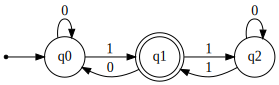

In [8]:
s1

In [9]:
dfa2 = FiniteAutomaton(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': {'q0'}, '1': {'q1'}},
        'q1': {'0': {'q0'}, '1': {'q2'}},
        'q2': {'0': {'q2'}, '1': {'q1'}}
    },
    initial_state='q0',
    final_states={'q1'}
)

In [10]:
s2 = dfa2.a_step()

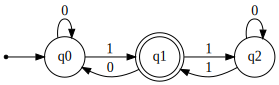

In [11]:
s2

In [12]:
_, steps = subset(dfa1, dfa2)

In [13]:
animate_list(lst=steps, play=True, interval=400)

Play(value=0, interval=400)

interactive(children=(IntSlider(value=0, description='step', max=3), Output()), _dom_classes=('widget-interact…

<function visualization_utils.animate_list.step_slice(lst, step)>